In [17]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import tqdm
import datetime

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
path = './dataset/train_images/' # Path to directory which contains classes

log_dir = "tensorboard/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

classes = os.listdir(path) # List of all classes
print('Total number of categories: {0}'.format(len(classes)))

Total number of categories: 14


Total number of images in dataset: 6913


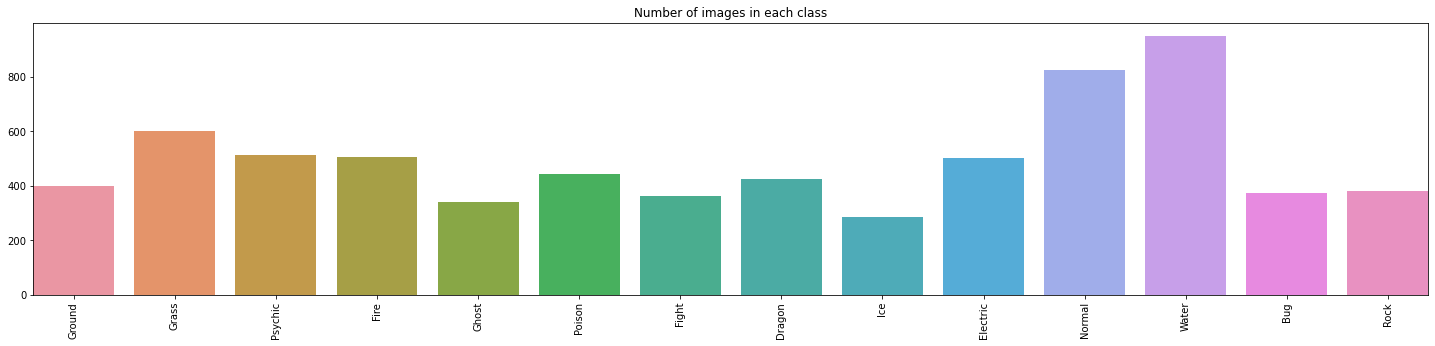

In [3]:
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))

num_images = sum(list(counts.values()))
print('Total number of images in dataset: {0}'.format(num_images))

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.barplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    dtype='float32')

train_generator = train_datagen.flow_from_directory(
    'dataset/train_images',
    batch_size=8,
    target_size=(300,300),
    class_mode='sparse',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'dataset/train_images',
    batch_size=8,
    target_size=(300,300),
    class_mode='sparse',
    subset="validation"
)

Found 5536 images belonging to 14 classes.
Found 1377 images belonging to 14 classes.


In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [11]:
model = tf.keras.applications.Xception(input_shape=(300,300,3), classes=14, weights=None)

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit_generator(train_generator, epochs=2, verbose=True, callbacks=[tensorboard_callback])

Epoch 1/2
  8/692 [..............................] - ETA: 6:14:28 - loss: 3.0373 - accuracy: 0.0938

KeyboardInterrupt: 